In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)
print(np.__version__)
print(pd.__version__)

2.20.0
2.3.3
2.3.2


# 簡單測試矩陣相乘-matmul

In [2]:
a= tf.constant([[1,2],[3,4]])
b= tf.constant([[5,6],[7,8]])
c= tf.matmul(a,b)
print(c)

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


# Tensor create
#### tf.Variable 即是將可學習的變數或導數設為Variable
#### 同時配上激勵(活)函數使用

In [3]:
w = tf.Variable([3.],dtype= tf.float32)
x = tf.Variable([2.],dtype= tf.float32)
b = tf.Variable([5.],dtype= tf.float32)
f=w*x+b
print(f)
o = tf.sigmoid(w*x+b) # 激勵函數
print(o)

tf.Tensor([11.], shape=(1,), dtype=float32)
tf.Tensor([0.9999833], shape=(1,), dtype=float32)


# 比較 constant 和 variable

In [4]:
a = tf.constant([1,2,3])
print(a)
b = np.array([1,2,3])
c = tf.convert_to_tensor(b,dtype=tf.int32)
print(c)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [5]:
# Variable 可以做為參數放入 function 中
x = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape: # 紀錄計算步驟，等會用於推導
    y=tf.square(x) # 可將 x 換成 a 會無法計算出 y_grad
y_gred = tape.gradient(y,x)
print(x,y,y_gred)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0> tf.Tensor(9.0, shape=(), dtype=float32) tf.Tensor(6.0, shape=(), dtype=float32)


# 簡單建立矩陣轉換
[c,r]
- 以3張圖 30X30 為例 -> [5,900]
- 輸出為 5X10 結果  -> [5,900]*[900,10]


In [10]:
x = tf.random.normal([5,900])
w1 = tf.Variable(tf.random.truncated_normal([900,10]),stddev=0.1)
b1 = tf.Variable(tf.zeros([10]))
r = tf.matmul(x,w1)+b1
r = tf.nn.relu(r)
print(r.shape)

(5, 10)


# 建立DNN
- Function API ex. layers.Dense()
- Sequential API
- Subclassing 子類化

In [12]:
# 以 dense 設置各層 Neural Network，同時可以指定每層激活函數
from tensorflow.keras import layers
f1 = layers.Dense(256,activation=tf.sigmoid) # 隱藏層1
f2 = layers.Dense(128,activation=tf.sigmoid) # 隱藏層2
f3 = layers.Dense(64,activation=tf.sigmoid) # 隱藏層3
f4 = layers.Dense(10,activation=None) # 輸出層

x = tf.random.normal([3,900])
h1 = f1(x)
h2 = f2(h1)
h3 = f3(h2)
out = f4(h3)
print(out.shape)

(3, 10)


In [13]:
# 以 Sequential 封裝
from tensorflow.keras import layers,Sequential
model = Sequential([
    layers.Dense(256,activation=tf.nn.relu),
    layers.Dense(128,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(10,activation=tf.nn.relu)
])
x = tf.random.normal([3,900])
out = model(x)
print(out.shape)

(3, 10)


In [14]:
# 改用 add 新增 layers
model = Sequential([])
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dense(128,activation=tf.nn.relu))
model.add(layers.Dense(64,activation=tf.nn.relu))
model.add(layers.Dense(10,activation=None))
x = tf.random.normal([3,900])
out = model(x)
print(out.shape)
print(model.summary())

(3, 10)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (3, 256)                    │         230,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (3, 128)                    │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (3, 64)                     │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (3, 10)                     │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,458 (1.04 MB)

 Trainable params: 272,458 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
# Subcalssing 子類化
# 先建立 可以繼承 tf.keras.Model 的子 class
class netModel(tf.keras.Model):
    def __init__(self):
        # 使用 super() 繼承 tf.keras.Model 中的 init 性質
        super().__init__()
        # 建立每層 DNN
        print(1)
        self.f1 = layers.Dense(256,activation=tf.nn.relu) # 隱藏層1
        print(2)
        self.f2 = layers.Dense(128,activation=tf.nn.relu) # 隱藏層2
        print(3)
        self.f3 = layers.Dense(64,activation=tf.nn.relu) # 隱藏層3
        print(4)
        self.f4 = layers.Dense(10,activation=None) # 輸出層
    def call(self, inputs, training = None, mask = None):
        # 執行各層
        x = self.f1(inputs)
        x = self.f2(x)
        x = self.f3(x)
        out = self.f4(x)
        return out
NM = netModel()
x = tf.random.normal([3,900])
out = NM(x)
print(out.shape)
print(NM.summary())

1
2
3
4
(3, 10)


Model: "net_model_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (3, 256)                    │         230,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (3, 128)                    │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (3, 64)                     │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (3, 10)                     │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,458 (1.04 MB)

 Trainable params: 272,458 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

None


# 損失函數 Loss Function

- Mean Square Error
- 交叉熵
- 極大似然估計法

In [6]:
# 計算二分類交叉entropy
def binary_crossentropy(y_pred,y):
    n = len(y)
    total_v = 0
    for i in range(n):
        total_v += (y[i]*tf.math.log(y_pred[i])+(1-y[i])*tf.math.log(1-y_pred[i]))
    total_v *= -1/n
    print(total_v)
y = [0.,1.,0.,1.]
y_pred = [0.5,0.8,0.3,0.5]
binary_crossentropy(y_pred,y)
loss =  tf.keras.losses.binary_crossentropy(y,y_pred)
print(loss)

tf.Tensor(0.4915282, shape=(), dtype=float32)
tf.Tensor(0.4915282, shape=(), dtype=float32)


In [18]:
# 多分類時
y = [0,0,1,0]
y_pred = [0.1,0.1,0.7,0.1] # 假設已通過 softmax, total == 1
# Categorial_crossentropy -> 適用於 one-hot。多標籤中只有一個元素為1 其餘皆是0，此時輸出層設之啟動函數為Softmax，輸出的機率總和皆是1，呈現出不同類別可能出現的機率
loss = tf.keras.losses.categorical_crossentropy(y,y_pred)
print(loss)
y_sp = tf.constant([1,2])
y_pred_sp = tf.constant([[0.2,0.8,0],[0.2,0.6,0.2]]) # 假設已通過 softmax, total == 1
# sparse_categorical_crossentropy -> 適用於非 one-hot，且標籤結果不再是0和1，可能為 0~2 之整數範圍。輸出層設之啟動函數為Softmax。
loss_sp = tf.keras.losses.sparse_categorical_crossentropy(y_sp,y_pred_sp)
print(loss_sp)

tf.Tensor(0.35667497, shape=(), dtype=float32)
tf.Tensor([0.22314365 1.6094378 ], shape=(2,), dtype=float32)


In [19]:
# 比較 one_hot 結果和 整數編碼之 crossentropy差異
y = tf.constant([1,2])
y_one_hot = [[0,1,0],[0,0,1]]
y_pred_sp = tf.constant([[0.2,0.8,0],[0.2,0.6,0.2]]) # 假設已通過 softmax, total == 1
# Categorial_crossentropy -> 適用於 one-hot。多標籤中只有一個元素為1 其餘皆是0，此時輸出層設之啟動函數為Softmax，輸出的機率總和皆是1，呈現出不同類別可能出現的機率
loss = tf.keras.losses.categorical_crossentropy(y_one_hot,y_pred_sp)
print(loss)
# sparse_categorical_crossentropy -> 適用於非 one-hot，且標籤結果不再是0和1，可能為 0~2 之整數範圍。輸出層設之啟動函數為Softmax。
loss_sp = tf.keras.losses.sparse_categorical_crossentropy(y,y_pred_sp)
print(loss_sp)

tf.Tensor([0.22314355 1.609438  ], shape=(2,), dtype=float32)
tf.Tensor([0.22314365 1.6094378 ], shape=(2,), dtype=float32)


# 優化 Neural Network
### 方法:
- Gradient descent(GD): 計算梯度找到局部最小值
- Stochastic Gradient descent(SGD):  隨機抽取樣本做 GD
- RMSprop優化器 (方均根反向傳播): 自適應學習率的優化器，利用過去所有梯度的方均根來調整權重參數的學習率，適用於RNN
- 動量法(Momentum): 可以直接使用 Adam 優化器(RMSprop結合Momentum)

In [3]:
# Gradient descent - 計算梯度找到局部最小值
# 方法1 建立 GradientTape (也可以用 fit()函數)
x = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
    y = tf.square(x)
y_gred = tape.gradient(y,x)
print(y,y_gred)

tf.Tensor(9.0, shape=(), dtype=float32) tf.Tensor(6.0, shape=(), dtype=float32)


[-10.    -1.     2.6    4.04   4.62   4.85   4.94   4.98   4.99   5.
   5.  ]


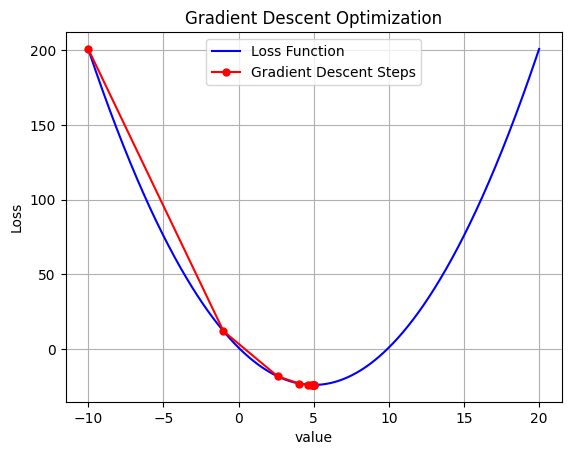

In [13]:
# Set Hyperparameters
x_ini = -10 #起始權重
epochs = 10 #執行週期數
lr = 0.3 #學習率

# 假設 loss function
def loss(x):
    y = x**2-10*x+1
    return y
# 宣告 loss function 之 gradient 函數
def dloss(x_value):
    x = tf.Variable(x_value, dtype=tf.float32)
    with tf.GradientTape() as tape:
        y = loss(x)
    y_gred = tape.gradient(y,x)
    return y_gred.numpy()
# graient descent function
def GD(x_ini, df, epochs, lr):
    xs = np.zeros(epochs+1)
    x = x_ini
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        # x_t+1 = x_t - lr * dx_t
        x -= lr*dx
        xs[i+1] = x
    return xs

w = GD(x_ini, dloss, epochs, lr=lr)
print(np.around(w,2))

t = np.arange(-10.0, 20.0, 0.001)
plt.plot(t, loss(t), c='b', label='Loss Function')
plt.plot(w, loss(w), c='r', marker='o', markersize=5, label='Gradient Descent Steps')
plt.title("Gradient Descent Optimization")
plt.xlabel("value")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

計算出的梯度 (dx, dy): (-8.0000, 25.0000)
更新後 (x, y): (-5.6000, -2.5000),[(<tf.Tensor: shape=(), dtype=float32, numpy=-8.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-5.599999904632568>), (<tf.Tensor: shape=(), dtype=float32, numpy=25.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.500000476837158>)]

計算出的梯度 (dx, dy): (-5.6000, -12.5000)
更新後 (x, y): (-3.9200, 1.2500),[(<tf.Tensor: shape=(), dtype=float32, numpy=-5.599999904632568>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-3.919999837875366>), (<tf.Tensor: shape=(), dtype=float32, numpy=-12.500001907348633>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.250000238418579>)]

計算出的梯度 (dx, dy): (-3.9200, 6.2500)
更新後 (x, y): (-2.7440, -0.6250),[(<tf.Tensor: shape=(), dtype=float32, numpy=-3.919999837875366>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.74399995803833>), (<tf.Tensor: shape=(), dtype=float32, numpy=6.250000953674316>, <tf.Variable 'Variable:0' shape=() dtype=floa

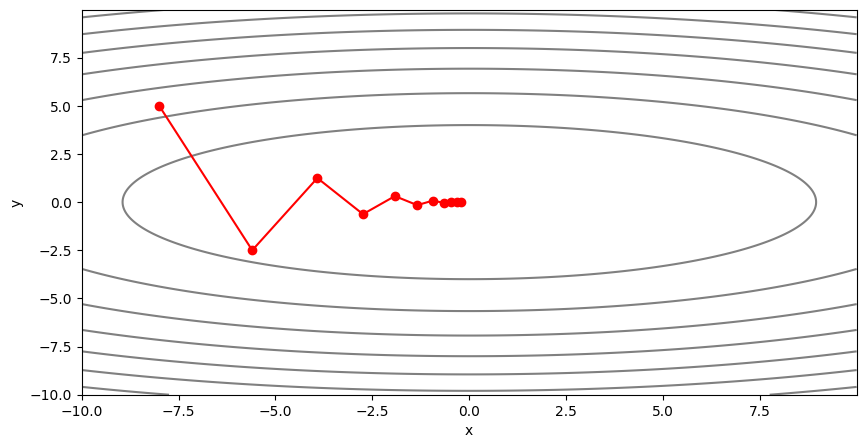

In [26]:
# Stochastic Gradient descent - 隨機抽取樣本做 GD
def obj_fun():
    output = (0.5)*(x**2)+2.5*(y**2)
    return output
def draw_fun(x,y):
    z = (0.5)*(x**2)+2.5*(y**2)
    return z
# 創建 Keras 中 SDG 優化器
opt = tf.keras.optimizers.SGD(learning_rate=0.3)
epochs = 10
# 初始值設置
x = tf.Variable(-8.00000)
y = tf.Variable(5.00000)
x_arr = [-8]
y_arr = [5]
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # (1) 計算當前的損失值
        loss = obj_fun()
    
    # 設置變數 [x, y]
    trainable_vars = [x,y]
    # (2) 計算在 (x,y) 上的梯度
    gradients = tape.gradient(loss, trainable_vars)
    # 梯度 dx = d/dx(0.5x^2 + 2.5y^2) = x
    # 梯度 dy = d/dy(0.5x^2 + 2.5y^2) = 5y
    print(f"計算出的梯度 (dx, dy): ({gradients[0].numpy():.4f}, {gradients[1].numpy():.4f})")
    # (3) 使用優化器將梯度應用到變數上
    # apply_gradients 需要一個 (梯度, 變數) 的配對列表
    opt.apply_gradients(zip(gradients, trainable_vars))
    print(f"更新後 (x, y): ({x.numpy():.4f}, {y.numpy():.4f}),{list(zip(gradients, trainable_vars))}\n")
    # 記錄這一步之後的變數值
    x_arr.append(x.numpy())
    y_arr.append(y.numpy())
x = np.arange(-10, 10, 0.01)
y = np.arange(-10, 10, 0.01)
X,Y = np.meshgrid(x,y)
Z = draw_fun(X,Y)
plt.figure(figsize = (10,5))
CS = plt.contour(X,Y,Z, colors = 'gray')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_arr,y_arr, c ='r')
for xt, yt in zip(x_arr,y_arr):
    plt.scatter(xt,yt,c='r')
plt.show()

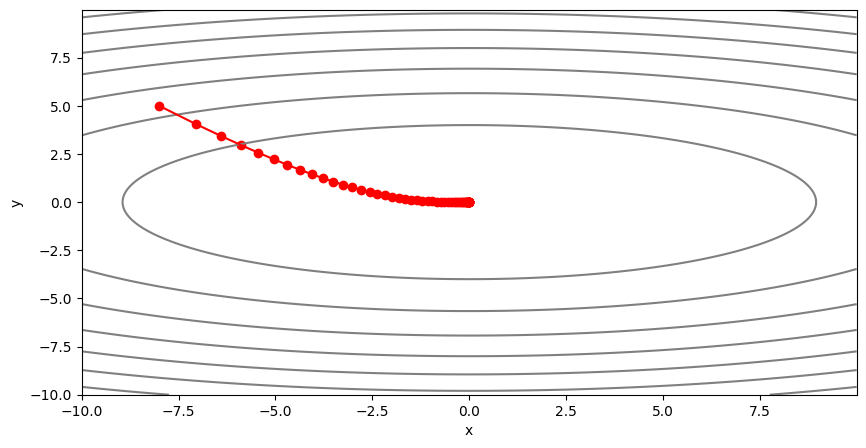

In [28]:
# RMSprop優化器
def obj_fun():
    output = (0.5)*(x**2)+2.5*(y**2)
    return output
def draw_fun(x,y):
    z = (0.5)*(x**2)+2.5*(y**2)
    return z
# 創建 Keras 中 RMSprop 優化器，設置梯度方均根衰減率 rho(衰減因子)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.3,rho=0.9)
epochs = 50
# 初始值設置
x = tf.Variable(-8.00000)
y = tf.Variable(5.00000)
x_arr = [-8]
y_arr = [5]
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # (1) 計算當前的損失值
        loss = obj_fun()
    
    # 設置變數 [x, y]
    trainable_vars = [x,y]
    # (2) 計算在 (x,y) 上的梯度
    gradients = tape.gradient(loss, trainable_vars)
    # 梯度 dx = d/dx(0.5x^2 + 2.5y^2) = x
    # 梯度 dy = d/dy(0.5x^2 + 2.5y^2) = 5y
    # print(f"計算出的梯度 (dx, dy): ({gradients[0].numpy():.4f}, {gradients[1].numpy():.4f})")
    # (3) 使用優化器將梯度應用到變數上
    # apply_gradients 需要一個 (梯度, 變數) 的配對列表
    opt.apply_gradients(zip(gradients, trainable_vars))
    # print(f"更新後 (x, y): ({x.numpy():.4f}, {y.numpy():.4f}),{list(zip(gradients, trainable_vars))}\n")
    # 記錄這一步之後的變數值
    x_arr.append(x.numpy())
    y_arr.append(y.numpy())
x = np.arange(-10, 10, 0.01)
y = np.arange(-10, 10, 0.01)
X,Y = np.meshgrid(x,y)
Z = draw_fun(X,Y)
plt.figure(figsize = (10,5))
CS = plt.contour(X,Y,Z, colors = 'gray')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_arr,y_arr, c ='r')
for xt, yt in zip(x_arr,y_arr):
    plt.scatter(xt,yt,c='r')
plt.show()

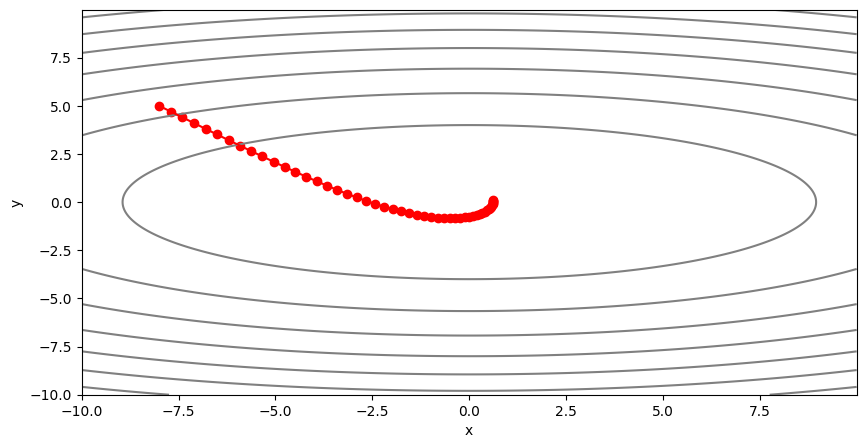

In [29]:
# 動量法
def obj_fun():
    output = (0.5)*(x**2)+2.5*(y**2)
    return output
def draw_fun(x,y):
    z = (0.5)*(x**2)+2.5*(y**2)
    return z
# 創建 Keras 中 Adam 優化器，第一動能指數衰減率 beta_1, 第二棟能指數衰減率 beta_2
opt = tf.keras.optimizers.Adam(learning_rate=0.3,beta_1=0.9,beta_2=0.999)
epochs = 50
# 初始值設置
x = tf.Variable(-8.00000)
y = tf.Variable(5.00000)
x_arr = [-8]
y_arr = [5]
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # (1) 計算當前的損失值
        loss = obj_fun()
    
    # 設置變數 [x, y]
    trainable_vars = [x,y]
    # (2) 計算在 (x,y) 上的梯度
    gradients = tape.gradient(loss, trainable_vars)
    # 梯度 dx = d/dx(0.5x^2 + 2.5y^2) = x
    # 梯度 dy = d/dy(0.5x^2 + 2.5y^2) = 5y
    # print(f"計算出的梯度 (dx, dy): ({gradients[0].numpy():.4f}, {gradients[1].numpy():.4f})")
    # (3) 使用優化器將梯度應用到變數上
    # apply_gradients 需要一個 (梯度, 變數) 的配對列表
    opt.apply_gradients(zip(gradients, trainable_vars))
    # print(f"更新後 (x, y): ({x.numpy():.4f}, {y.numpy():.4f}),{list(zip(gradients, trainable_vars))}\n")
    # 記錄這一步之後的變數值
    x_arr.append(x.numpy())
    y_arr.append(y.numpy())
x = np.arange(-10, 10, 0.01)
y = np.arange(-10, 10, 0.01)
X,Y = np.meshgrid(x,y)
Z = draw_fun(X,Y)
plt.figure(figsize = (10,5))
CS = plt.contour(X,Y,Z, colors = 'gray')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_arr,y_arr, c ='r')
for xt, yt in zip(x_arr,y_arr):
    plt.scatter(xt,yt,c='r')
plt.show()

# MNIST 手寫數字辨識練習

In [20]:
from tensorflow.keras.datasets import mnist
# download mnist data
(train_data, train_label),(test_data, test_label) = mnist.load_data()
print(train_label)
print( test_label)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


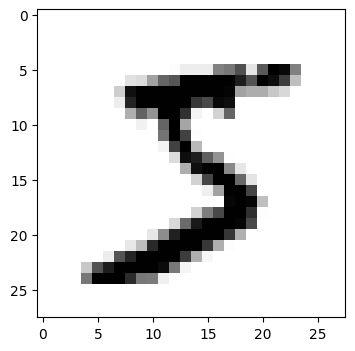

In [21]:
def plot_im(data):
    fig = plt.gcf()
    fig.set_size_inches(4,4)
    plt.imshow(data,cmap = 'binary')
    plt.show()
plot_im(train_data[0])

In [37]:
lr = 0.01
train_epoch = 1000
batch_size = 2000  #每次訓練大小
# 前置處理，先將 28X28 影像展成 784
train_data_r,test_data_r = train_data.reshape([-1,784]).astype('float32'),test_data.reshape([-1,784]).astype('float32')
# normalize data
train_data_r,test_data_r = train_data_r/255.,test_data_r/255.
# 創建dataset,每行所對應的正確lable
train_data_s = tf.data.Dataset.from_tensor_slices((train_data_r, train_label))
# 洗牌後分批
train_data_m = train_data_s.shuffle(5000).batch(batch_size)

In [38]:
# Create model
# 輸入 784 筆資料，依序執行 256/128/64 個節點，由於數字介於0-9，所以最後以輸出10個節點，且用softmax輸出10個數字的機率大小
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [55]:
# 選擇優化器
optimizer = tf.keras.optimizers.SGD(lr)
# define loss func.
def cross_entropy_loss(label,Y_pred):
    # loss func.
    scce = tf.keras.losses.SparseCategoricalCrossentropy()
    # 其中先對label 進行 one hot，在查找 y_pred 中，接著將 sum(one_hot標籤* (-log(p)) 即是 loss
    loss = scce(label,y_pred)
    return tf.reduce_mean(loss) # 計算 loss 平均
# 計算 accuracy
def accuracy(y_pred,y):
    # 抓取 y_pred 中，沿著第二維度(axis=1)查找最大數值的index, 並且與正確值比較(將正確值轉成 int64)
    correct_pred = tf.equal(tf.argmax(y_pred, 1),
                           tf.cast(y, tf.int64))
    return tf.reduce_mean(tf.cast(correct_pred, tf.float32),axis = -1) # axis = -1表示沿著最後一個維度計算

In [42]:
for epoch in range(train_epoch):
    for step, (batch_data,batch_label) in enumerate(train_data_m):
        with tf.GradientTape() as tape:
            pre_data = model(batch_data)
            loss = cross_entropy_loss(batch_label,pre_data)
            acc = accuracy(pre_data,batch_label)
            trainable_variables = model.trainable_variables
            gradients = tape.gradient(loss,trainable_variables)
        optimizer.apply_gradients(zip(gradients,trainable_variables))
    testprec = model(test_data_r)
    testloss = cross_entropy_loss(testprec,test_label)
    testacc = accuracy(testprec,test_label)
    print("Testloss %f, test acc %f"%(testloss,testacc))
    

Testloss 2.173448, test acc 0.339800
Testloss 2.037697, test acc 0.486600
Testloss 1.867662, test acc 0.563300
Testloss 1.667231, test acc 0.623200
Testloss 1.458565, test acc 0.686000
Testloss 1.262515, test acc 0.743900
Testloss 1.091941, test acc 0.781800
Testloss 0.953484, test acc 0.806900
Testloss 0.845021, test acc 0.822200
Testloss 0.759888, test acc 0.834800
Testloss 0.692849, test acc 0.844100
Testloss 0.639478, test acc 0.851500
Testloss 0.596483, test acc 0.859300
Testloss 0.561237, test acc 0.865700
Testloss 0.531771, test acc 0.871400
Testloss 0.507182, test acc 0.874300
Testloss 0.485988, test acc 0.878700
Testloss 0.467746, test acc 0.882700
Testloss 0.451816, test acc 0.885300
Testloss 0.437957, test acc 0.887300
Testloss 0.425339, test acc 0.890500
Testloss 0.414294, test acc 0.891500
Testloss 0.404117, test acc 0.893700
Testloss 0.395100, test acc 0.894600
Testloss 0.387267, test acc 0.896500
Testloss 0.379411, test acc 0.898300
Testloss 0.372684, test acc 0.898500
T

# Keras 建立模型基本流程
    1.訓練資料
    2.建立模型:
        - 序列式(Sequential)
        - 函數式(Function API)
        - 子類化(Model Subclassing)
    3.編譯模型(model.compile)
    4.訓練模型(model.fit())
    5.模型評估(model.evaluate())
    6.模型預測(model.predict())

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_data,train_label),(test_data,test_label) = mnist.load_data()

In [4]:
model = Sequential([
    layers.Flatten(input_shape = (28,28)), #攤平成 784
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
# compile 每層model，其中設定優化器/損失函數/成效衡量指標
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# fit() 會存在 history 屬性紀錄疊代過程, let his =model.fit(train_data,train_label,epochs=10)/ his.hi
model.fit(train_data,train_label,epochs=10)
# verbose =2 為每個 epoch 輸出一行紀錄
model.evaluate(test_data,test_label,verbose=2)

D:\VSC Workbook\DL_tensorflow\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8803 - loss: 0.8274
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9423 - loss: 0.2142
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9550 - loss: 0.1603
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9639 - loss: 0.1290
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9688 - loss: 0.1122
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9735 - loss: 0.0942
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9763 - loss: 0.0829
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9791 - loss: 0.0775
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9816 - loss: 0.0694
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9841 - loss: 0.0597
313/313 - 1s - 2ms/step - accuracy: 0.9680 - loss: 0.1514


[0.15135149657726288, 0.9679999947547913]

# Note:
- # 另外優化器設置可以用三種方式:
#### 1.固有名稱
```json
model.compile(optimizer='adam',
         loss='sparse_categorical_crossentropy',
         metrics=['accuracy'])
or
model.compile(optimizer='sgd',
         loss='mse',
         metrics=['acc'])
```
#### 2.設定函數帶入
```json
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=sgd,
         loss='mse',
         metrics=['acc'])
```
#### 3.直接帶入函數設定 lr、momentum和超參數
```json
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.SGD(lr=0.01,momentum=0.9),
         loss='mse',
         metrics=['acc'])
```
##### -> sgd tf.optimizers.SGD
##### -> Adagrad tf.keras.optimizers.Adagrad
##### -> Adadelta tf.keras.optimizers.Adadelta
##### -> Adam tf.keras.optimizers.Adam
# ----------------------------------------------- #
- # Metrics 亦有兩種方式設定
#### 1.直接使用字串
```json
model.compile(optimizer=optimizers.SGD(lr=0.01,momentum=0.9),
         loss='mse',
         metrics=['mae','acc'])
```
#### 2.使用 keras 類別
```json
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.SGD(lr=0.01,momentum=0.9),
         loss='mse',
         metrics=[metrics.mae,metrics.categorical_accuracy])
```
### PS 細節配置要再多嘗試

# Early Stop
#### 設置 Early stop 提早停止訓練
```json
tf.keras.callbacks.EarlyStopping(monitor= 'acc', min_dealta = 0.01, patience = 0.05, verbose = 0, mode = 'auto')

monitor 為監控 metrics 之監控評估數據, ex. 'acc'/'val_acc'/'loss'/'val_loss'...etc。
min_delta 為判斷監控之數據的改善浮動是否大於 min_delta
```

# Early Stop
#### 監控 metrics 數據，達到設置標準則停止訓練
```json
tf.keras.callbacks.EarlyStopping(monitor='acc', min_delta=0.1, patience=0, verbose=0, mode='auto')
monitor 為設置監控 metrics參數，可為 'acc'/'val_acc'/'loss'/'val_loss'...etc。
min_delta 為監控數據改善之變動幅度是否大於 min_delta。
patience 為容忍多少 epoch 之內。
verbose 為 0 or 1。當1時，則在early stopping後，顯示哪一個周期停止。
mode 為 'auto'/'min'/'max'。若希望監控之數據越大則設max，反之則設 min，ex 'loss' 則選 'min'。
```

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

(train_data,train_label),(test_data,test_label) = mnist.load_data()

model = Sequential([
    layers.Flatten(input_shape = (28,28)), #攤平成 784
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
num_epochs = 100
# compile 每層model，其中設定優化器/損失函數/成效衡量指標
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy',
                     metrics.SparseTopKCategoricalAccuracy(k=5)]) # 只抓分類中該類別預測分數最大的前 k 位計算
# Set Early stop
es = EarlyStopping(
    monitor = 'sparse_top_k_categorical_accuracy',
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode='auto',
    restore_best_weights=True # 停止訓練時恢復到最佳權重
)
# fit() 會存在 history 屬性紀錄疊代過程, let his =model.fit(train_data,train_label,epochs=10)/ his.hi
model.fit(train_data,train_label,
          validation_split=0.2,
          epochs=num_epochs,
         callbacks=[es])
# verbose =2 為每個 epoch 輸出一行紀錄
model.evaluate(test_data,test_label,verbose=2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9295 - loss: 0.2362 - sparse_top_k_categorical_accuracy: 0.9945 - val_accuracy: 0.9617 - val_loss: 0.1246 - val_sparse_top_k_categorical_accuracy: 0.9987
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9695 - loss: 0.0989 - sparse_top_k_categorical_accuracy: 0.9992 - val_accuracy: 0.9660 - val_loss: 0.1146 - val_sparse_top_k_categorical_accuracy: 0.9985
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9788 - loss: 0.0673 - sparse_top_k_categorical_accuracy: 0.9996 - val_accuracy: 0.9744 - val_loss: 0.0933 - val_sparse_top_k_categorical_accuracy: 0.9988
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0530 - sparse_top_k_categorical_accuracy: 0.9999 - val_accuracy: 0.9696 - val_loss: 0.1065 - val_sparse_top_k_categorical_accuracy: 0.9989
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9855 - loss: 0.0432 - sparse_top_k_cate

[0.104667067527771, 0.9668999910354614, 0.9991999864578247]

# Save Model

- tf 原生 SaceModel
- 只存權重 save_weight
- 保存模型格式和權重 save

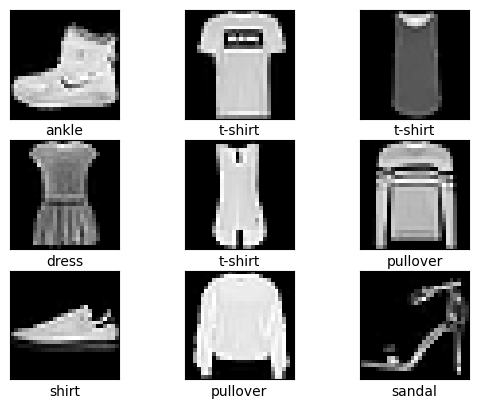

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping
(train_image,train_label),(test_image,test_label) = fashion_mnist.load_data()
class_name = ['t-shirt','trouser','pullover','dress','coat','sandal','sneaker','shirt','bag','ankle']

def show_image(train_image,train_label):
    for i in range(9):
        plt.subplot(330+1+i)
        plt.imshow(train_image[i],cmap=plt.get_cmap('gray'))
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(class_name[train_label[i]])
    plt.show()
show_image(train_image,train_label)



In [10]:
def process_data(x,y):
    x = tf.cast(x, dtype= tf.float32)/255.
    y = tf.cast(y, dtype= tf.int32)
    return x,y
def build_model():
    
    model = Sequential()
    model.add(tf.keras.Input(shape=(28, 28)))  # 使用 Input Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(256,activation='relu'))
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(10,activation='softmax'))
    return model

model = build_model()
print(model.summary)

<bound method Model.summary of <Sequential name=sequential_3, built=True>>


In [11]:
# compile 每層model，其中設定優化器/損失函數/成效衡量指標
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) 
train_image,train_label = process_data(train_image,train_label)
# Set Early stop
es = EarlyStopping(
    monitor = 'accuracy',
    min_delta=0.01,
    patience=3,
    verbose=1,
    mode='auto',
    restore_best_weights=True # 停止訓練時恢復到最佳權重
)
# fit() 會存在 history 屬性紀錄疊代過程, let his =model.fit(train_data,train_label,epochs=10)/ his.hi
his=model.fit(train_image,train_label,
            validation_split=0.2,
            epochs=100,
            batch_size=128,
            callbacks=[es]
             )

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8100 - loss: 0.5416 - val_accuracy: 0.8496 - val_loss: 0.4172
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8636 - loss: 0.3787 - val_accuracy: 0.8700 - val_loss: 0.3618
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8766 - loss: 0.3380 - val_accuracy: 0.8647 - val_loss: 0.3771
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.3103 - val_accuracy: 0.8768 - val_loss: 0.3396
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8898 - loss: 0.2950 - val_accuracy: 0.8795 - val_loss: 0.3353
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8967 - loss: 0.2773 - val_accuracy: 0.8750 - val_loss: 0.3423
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8990 - loss: 0.2674 - val_accuracy: 0.8850 - val_loss: 0.3176
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9061 - loss: 0.2509 - val_accu

In [12]:
test_image,test_label = process_data(test_image,test_label)
pred_im15 = model.predict(test_image[:15])
pred_ids15 = np.argmax(pred_im15,axis=1) # 取出15張機率最大的 index
print("predict label:", pred_ids15[:15])
print("test label:", test_label[:15])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
predict label: [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4]
test label: tf.Tensor([9 2 1 1 6 1 4 6 5 7 4 5 7 3 4], shape=(15,), dtype=int32)


In [14]:
model.save('Fasion_model.h5')
del model

NameError: name 'model' is not defined

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping

def process_data(x,y):
    x = tf.cast(x, dtype= tf.float32)/255.
    y = tf.cast(y, dtype= tf.int32)
    return x,y
(train_image,train_label),(test_image,test_label) = fashion_mnist.load_data()
test_image,test_label = process_data(test_image,test_label)
model2 = tf.keras.models.load_model('Fasion_model.h5', compile=False) # 重新編譯模型並設置相應的優化器和損失函數，改為True，只要預測則改False
pred_im15 = model2.predict(test_image[:15])
loss,acc = model2.evaluate(test_image,test_label)
pred_ids15 = np.argmax(pred_im15,axis=1) # 取出15張機率最大的 index
print("predict label:", pred_ids15[:15])
print("test label:", test_label[:15])
print("test loss:", loss)
print("test acc:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


ValueError: You must call `compile()` before using the model.

In [7]:
# 重新載入 model，放進新資料重新訓練

from tensorflow.keras.datasets import fashion_mnist

def process_data(x,y):
    x = tf.cast(x, dtype= tf.float32)/255.
    y = tf.cast(y, dtype= tf.int32)
    return x,y

(train_image,train_label),(test_image,test_label) = fashion_mnist.load_data()
train_image,train_label = process_data(train_image,train_label)
model3 = tf.keras.models.load_model('Fasion_model.h5') # 重新編譯模型並設置相應的優化器和損失函數，改為True，只要預測則改False
# 即使是繼續訓練，也要告訴 Keras 這次訓練要用的優化器、損失函數和評估指標
model3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy', # 因為標籤是整數 (0, 1, 2...)
               metrics=['accuracy'])
# 查看模型摘要，確認模型已編譯
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Layer (type)          ┃ Output Shape    ┃  Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ flatten_2 (Flatten)   │ (None, 784)     │        0 │
├───────────────────────┼─────────────────┼──────────┤
│ dense_8 (Dense)       │ (None, 256)     │  200,960 │
├───────────────────────┼─────────────────┼──────────┤
│ dense_9 (Dense)       │ (None, 128)     │   32,896 │
├───────────────────────┼─────────────────┼──────────┤
│ dense_10 (Dense)      │ (None, 64)      │    8,256 │
├───────────────────────┼─────────────────┼──────────┤
│ dense_11 (Dense)      │ (None, 10)      │      650 │
└───────────────────────┴─────────────────┴──────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
batch = 128
model3.fit(train_image,train_label,epochs = 10,
          batch_size = batch,
          validation_split = 0.2,
          verbose = 2)
loss,acc = model3.evaluate(test_image,test_label)
print("test loss:", loss)
print("test acc:", acc)
# Save_Weight 另外更加輕量化儲存，但是並無存 model本身，若要重新使用，必須使用相同結構才可以
model3.save_weights('retrain_weight.weights.h5')

Epoch 1/10
375/375 - 1s - 3ms/step - accuracy: 0.9574 - loss: 0.1116 - val_accuracy: 0.8930 - val_loss: 0.4275
Epoch 2/10
375/375 - 1s - 3ms/step - accuracy: 0.9567 - loss: 0.1123 - val_accuracy: 0.8923 - val_loss: 0.4249
Epoch 3/10
375/375 - 1s - 3ms/step - accuracy: 0.9613 - loss: 0.1018 - val_accuracy: 0.8984 - val_loss: 0.4348
Epoch 4/10
375/375 - 1s - 3ms/step - accuracy: 0.9616 - loss: 0.1010 - val_accuracy: 0.8981 - val_loss: 0.4143
Epoch 5/10
375/375 - 1s - 3ms/step - accuracy: 0.9599 - loss: 0.1021 - val_accuracy: 0.8913 - val_loss: 0.4371
Epoch 6/10
375/375 - 1s - 3ms/step - accuracy: 0.9632 - loss: 0.0969 - val_accuracy: 0.8915 - val_loss: 0.4409
Epoch 7/10
375/375 - 1s - 2ms/step - accuracy: 0.9634 - loss: 0.0954 - val_accuracy: 0.8924 - val_loss: 0.4640
Epoch 8/10
375/375 - 1s - 3ms/step - accuracy: 0.9634 - loss: 0.0959 - val_accuracy: 0.8951 - val_loss: 0.4576
Epoch 9/10
375/375 - 1s - 3ms/step - accuracy: 0.9662 - loss: 0.0923 - val_accuracy: 0.8994 - val_loss: 0.4659
E

In [17]:
# 再次使用 Save_weight結果如下
def build_model():
    
    model = Sequential()
    model.add(tf.keras.Input(shape=(28, 28)))  # 使用 Input Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(256,activation='relu'))
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(10,activation='softmax'))
    return model
weight_model = build_model()
weight_model.compile(optimizer = 'adam',
                    loss = 'sparse_categorical_crossentropy',
                    metrics=['accuracy'])
weight_model.load_weights('retrain_weight.weights.h5')
loss,acc = weight_model.evaluate(test_image,test_label)
print("test loss:", loss)
print("test acc:", acc)
# Save 整體 model
weight_model.save('retrain_model.keras')

D:\VSC Workbook\DL_tensorflow\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8798 - loss: 98.7084
test loss: 98.70843505859375
test acc: 0.879800021648407


# Callback 功能
- 指定時刻存模型
```
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath, # 保存的model 路徑
    verbose=0,  # 訊息模式 0 or 1
    monitor='accuracy', # 監測數據
    save_best_only=False, # True 則被監測數據的最佳模型不會被覆蓋
    save_weights_only=False, # 是否只保存權重
    mode='max',
    save_freq=epoch # 代表每周期結束存模型
    )
```

In [26]:
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
# 再次使用 Save_weight結果如下
def build_model():
    
    model = Sequential()
    model.add(tf.keras.Input(shape=(28, 28)))  # 使用 Input Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(256,activation='relu'))
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(10,activation='softmax'))
    return model


(train_data,train_label),(test_data,test_label) = mnist.load_data()

model = build_model()
model.compile(optimizer = 'adam',
                    loss = 'sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# 呼叫 ModelCheckpoint
filepath = r'temp/Weight.{epoch:02d}-{val_accuracy:.4f}.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=filepath, # 保存的model 路徑
    verbose=1,  # 訊息模式 0 or 1
    monitor='val_accuracy', # 監測數據
    save_best_only=True
    )
es = EarlyStopping(monitor='val_accuracy',min_delta= 0.01,patience=0,verbose=1)
model.fit(train_data,train_label,
         epochs=20,batch_size=512,
         validation_split=0.2,verbose=2,
         callbacks=[es,model_checkpoint_callback])
model.evaluate(test_data,test_label,verbose=2)

Epoch 1/20

Epoch 1: val_accuracy improved from None to 0.87733, saving model to temp/Weight.01-0.8773.h5


94/94 - 1s - 15ms/step - accuracy: 0.7756 - loss: 4.3070 - val_accuracy: 0.8773 - val_loss: 0.6807
Epoch 2/20

Epoch 2: val_accuracy improved from 0.87733 to 0.90133, saving model to temp/Weight.02-0.9013.h5


94/94 - 1s - 8ms/step - accuracy: 0.8941 - loss: 0.5070 - val_accuracy: 0.9013 - val_loss: 0.4391
Epoch 3/20

Epoch 3: val_accuracy improved from 0.90133 to 0.92225, saving model to temp/Weight.03-0.9222.h5


94/94 - 1s - 8ms/step - accuracy: 0.9234 - loss: 0.3152 - val_accuracy: 0.9222 - val_loss: 0.3598
Epoch 4/20

Epoch 4: val_accuracy improved from 0.92225 to 0.92783, saving model to temp/Weight.04-0.9278.h5


94/94 - 1s - 8ms/step - accuracy: 0.9437 - loss: 0.2153 - val_accuracy: 0.9278 - val_loss: 0.3328
Epoch 4: early stopping
313/313 - 1s - 2ms/step - accuracy: 0.9241 - loss: 0.3338


[0.33383601903915405, 0.9240999817848206]

# Dropout
- 在每層訓練時，依照一定機率將某些神經元暫時斷開，減少訓練時模型計算
- 測試時會使用到所有神經元
- 兩種使用方法:
```
tf.nn.dropout(x, # 輸入之 float tensor
              keep_prob, # 表示 x 中元素被保留下來的機率
              noise_shape=None,
              seed=None,
              Name=None
             )
tf.layers.dropout(x,
                  rate = 0.5, #表示 x中有50%元素會被丟棄
                  noise_shape=None,
                  seed=None,
                  training = False, # True 則訓練階段進行 dropout
                  name=None)
```

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping

def process_data(x,y):
    x = tf.cast(x, dtype= tf.float32)/255.
    y = tf.cast(y, dtype= tf.int32)
    return x,y
def build_model():
    
    model = Sequential()
    model.add(tf.keras.Input(shape=(28, 28)))  # 使用 Input Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(256,activation='relu'))
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10,activation='softmax'))
    return model

(train_image,train_label),(test_image,test_label) = fashion_mnist.load_data()

model = build_model()

model.compile(optimizer = 'adam',
                    loss = 'sparse_categorical_crossentropy',
                    metrics=['accuracy'])
train_image,train_label = process_data(train_image,train_label)
# es = EarlyStopping(monitor='val_accuracy',min_delta= 0.01,patience=0,verbose=1)
his=model.fit(train_data,train_label,
         epochs=20,batch_size=128,
         validation_split=0.2,verbose=2)
loss,acc=model.evaluate(test_image,test_label,verbose=2)
print("test loss:", loss)
print("test acc:", acc)

Epoch 1/20
375/375 - 2s - 6ms/step - accuracy: 0.0984 - loss: 4.9518 - val_accuracy: 0.0983 - val_loss: 2.3035
Epoch 2/20
375/375 - 2s - 5ms/step - accuracy: 0.0999 - loss: 2.3033 - val_accuracy: 0.0983 - val_loss: 2.3030
Epoch 3/20
375/375 - 2s - 4ms/step - accuracy: 0.0993 - loss: 2.3029 - val_accuracy: 0.0957 - val_loss: 2.3029
Epoch 4/20
375/375 - 1s - 3ms/step - accuracy: 0.0993 - loss: 2.3028 - val_accuracy: 0.0957 - val_loss: 2.3026
Epoch 5/20
375/375 - 1s - 4ms/step - accuracy: 0.1004 - loss: 2.3027 - val_accuracy: 0.0983 - val_loss: 2.3026
Epoch 6/20
375/375 - 2s - 5ms/step - accuracy: 0.0990 - loss: 2.3029 - val_accuracy: 0.1003 - val_loss: 2.3027
Epoch 7/20
375/375 - 2s - 4ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3027
Epoch 8/20
375/375 - 1s - 4ms/step - accuracy: 0.0999 - loss: 2.3029 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 9/20
375/375 - 1s - 4ms/step - accuracy: 0.0973 - loss: 2.3029 - val_accuracy: 0.0957 - val_loss: 2.3028
E

# 正規化 Reqularization
- 減少機器學習過擬合問題

D:\VSC Workbook\DL_tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,545 (170.10 KB)

 Trainable params: 43,545 (170.10 KB)

 Non-trainable params: 0 (0.00 B)

模型訓練完成！

最終模型在整個資料集上的表現：
損失 (Loss): 0.0706
準確率 (Accuracy): 0.9980


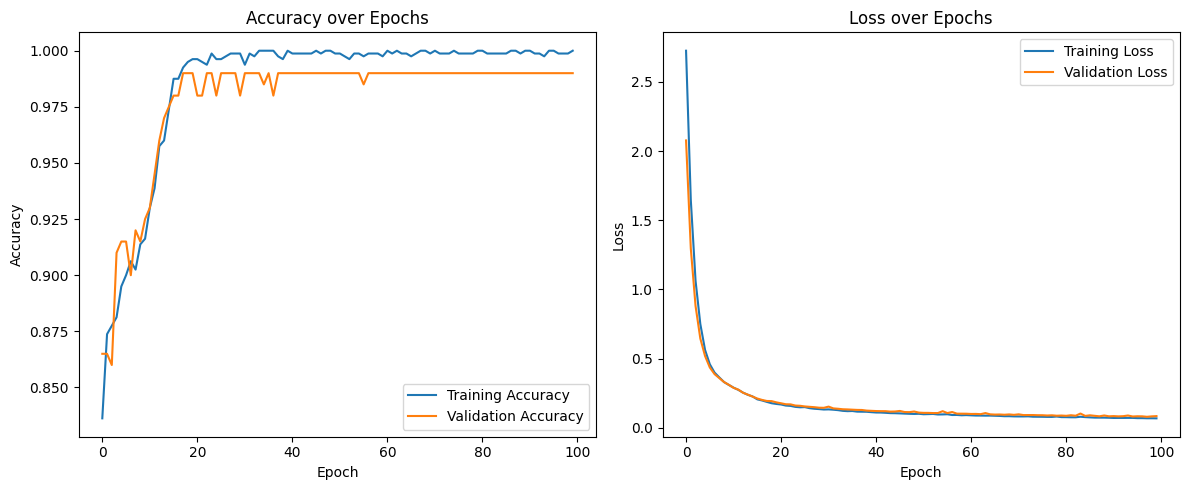

In [2]:
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,regularizers

# 產生資料
x, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

def build_model(_lambda):
    # 建立正則化NN
    model = Sequential()
    # 第 1 層：輸入層，不帶正則化項
    # 使用 input_shape=(2,) 是更現代的寫法
    model.add(layers.Dense(8, input_shape=(2,), activation='relu'))

    # 第 2 層：帶 L2 正則化
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(_lambda)))

    # 第 3 層：帶 L2 正則化
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(_lambda)))

    # 第 4 層：帶 L2 正則化
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(_lambda)))

    # 輸出層
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # 編譯模型
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# 測試一下模型是否能成功建立
# 假設我們設定一個 lambda 值
lambda_val = 0.01
model = build_model(lambda_val)
model.summary() # 執行 summary() 來檢查模型架構是否正確
history = model.fit(
    x, 
    y, 
    epochs=100,            # 訓練 100 個週期
    batch_size=32,         # 每個批次 32 個樣本
    validation_split=0.2,  # 使用 20% 的資料進行驗證
    verbose=0              # 設定為 0 表示不顯示每個 epoch 的訓練過程，訓練完畢後再看結果
)
print("模型訓練完成！")

# --- 5. 評估並視覺化結果 ---

# 評估模型在整個資料集上的最終表現
loss, accuracy = model.evaluate(x, y, verbose=0)
print(f"\n最終模型在整個資料集上的表現：")
print(f"損失 (Loss): {loss:.4f}")
print(f"準確率 (Accuracy): {accuracy:.4f}")

# 繪製訓練過程中的損失和準確率變化
def plot_history(history):
    # 獲取歷史記錄
    hist = history.history
    
    plt.figure(figsize=(12, 5))
    
    # 繪製準確率
    plt.subplot(1, 2, 1)
    plt.plot(hist['accuracy'], label='Training Accuracy')
    plt.plot(hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # 繪製損失
    plt.subplot(1, 2, 2)
    plt.plot(hist['loss'], label='Training Loss')
    plt.plot(hist['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)


In [15]:
x_min, x_max = x[:, 0].min() , x[:, 0].max()
y_min, y_max = x[:, 1].min() , x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # np.c_[xx.ravel(), yy.ravel()] 將 2 維壓縮回 (len(x),len(y))之型態
# z = z.reshape(xx.shape)
print(z)

536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
[[0.6291898 ]
 [0.69240254]
 [0.74913573]
 ...
 [0.99454594]
 [0.99549836]
 [0.9962851 ]]


536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


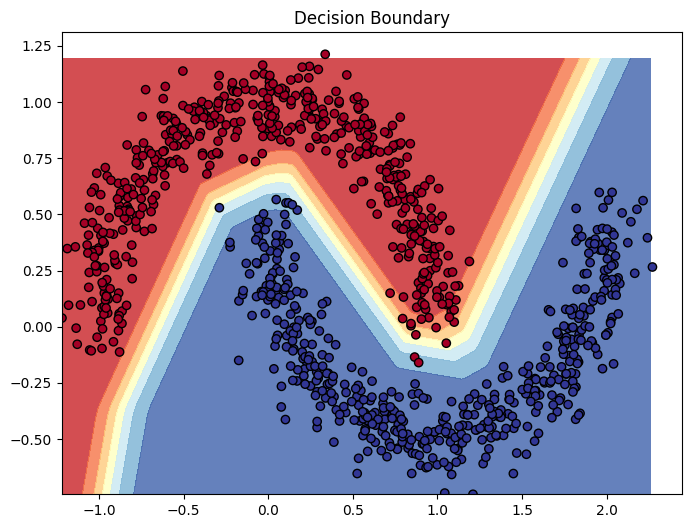

In [13]:
# 繪製決策邊界
def plot_decision_boundary(model, x, y):
    x_min, x_max = x[:, 0].min() , x[:, 0].max()
    y_min, y_max = x[:, 1].min() , x[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # np.c_[xx.ravel(), yy.ravel()] 將 2 維壓縮回 (len(x),len(y))之型態
    z = z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, x, y)

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\11010059\AppData\Local\Temp\ipykernel_26088\447246037.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, y, label='$y = |7\sin(3x + \pi/5) + 1|$')
C:\Users\11010059\AppData\Local\Temp\ipykernel_26088\447246037.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Graph of $y = |7\sin(3x + \pi/5) + 1|$ with Horizontal Lines')


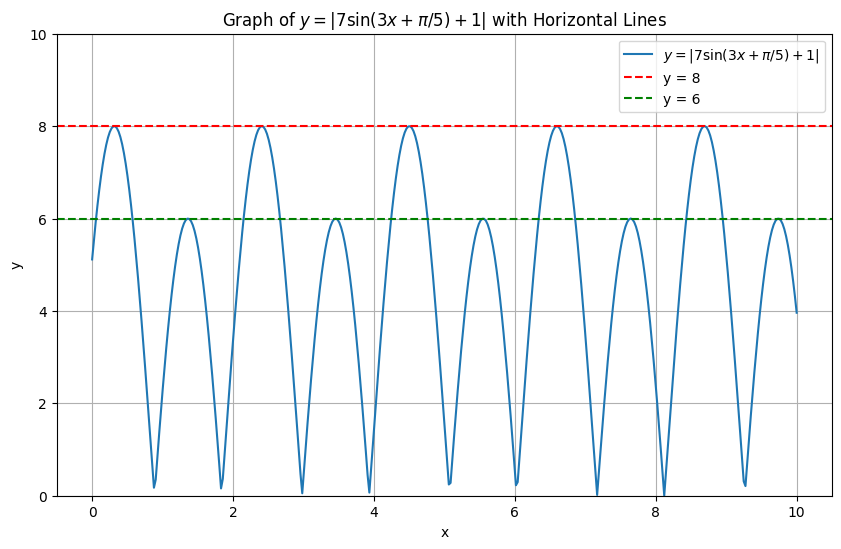

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 定義 x 軸範圍和函數
x = np.linspace(0, 10, 400)  # 在 0 到 10 之間產生 400 個點
y = np.abs(7 * np.sin(3*x + np.pi/5) + 1)

# 2. 繪製函數圖形
plt.figure(figsize=(10, 6))  # 設置圖形大小
plt.plot(x, y, label='$y = |7\sin(3x + \pi/5) + 1|$')

# 3. 添加水平線
plt.axhline(y=8, color='r', linestyle='--', label='y = 8')  # 在 y=8 處添加紅色虛線
plt.axhline(y=6, color='g', linestyle='--', label='y = 6')  # 在 y=6 處添加綠色虛線

# 4. 添加標題、軸標籤和圖例
plt.title('Graph of $y = |7\sin(3x + \pi/5) + 1|$ with Horizontal Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()  # 顯示圖例
plt.grid(True)  # 顯示網格線

# 5. 調整 y 軸範圍 (可選)
plt.ylim(0, 10) # 讓 y 軸顯示 0 到 10 之間的值，更易於觀察水平線

# 6. 顯示圖形
plt.show()

# Tensorboard Intro.
- 可視化模型網絡架構
- 跟蹤指標
- 檢查流程中的權重、bias和其他組件
- 顯示非表格數據
- 將高維嵌入投影到低維度
### 可搭配 tf.summary() 一起使用
    summary 本身即是對 Tensor 取值監控的一種Operation。
    1.Scalar():保存單一值並生成折線圖。
    2.Histogram():保存一張量並以直方圖或密度圖呈現。
    3.Text():保存 tf.string類型文本。
    4.image():保存形狀為[k,h,w,c] 之tensor 圖片。
    5.audio():保存形狀為[k,t,c] 之tensor 音頻。

In [1]:
# Scalar sample
import tensorflow as tf
import datetime
from tensorflow.keras import datasets,losses,layers,optimizers,metrics,Sequential

def preprocess(x,y):
    x = tf.cast(x, dtype= tf.float32)/255.
    y = tf.cast(y, dtype= tf.int32)
    return x,y
# logging data
(x,y),(x_test,y_test) = datasets.fashion_mnist.load_data()
train_data, train_label = preprocess(x,y)
test_data,test_label = preprocess(x_test,y_test)

# ================================================== #
# create model
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax')
])
# create loss func.
loss_func = losses.SparseCategoricalCrossentropy()
opt = optimizers.Adam()

# defined efficiency metrics
train_loss = metrics.Mean('train_loss',dtype=tf.float32)
train_acc = metrics.SparseCategoricalAccuracy('train_accuracy')
test_loss = metrics.Mean('test_loss',dtype=tf.float32)
test_acc = metrics.SparseCategoricalAccuracy('test_accuracy')

def train_step(model, optimizer, x_train, y_train):
    with tf.GradientTape() as tape:
        pred = model(x_train, training = True)
        loss = loss_func(y_train,pred)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads,model.trainable_variables))

    train_loss(loss)
    train_acc(y_train,pred)
def test_step(model,x_test,y_test):
    # prediction
    pred = model(x_test)
    loss = loss_func(y_test,pred)

    test_loss(loss)
    test_acc(y_test,pred)

# ==================================================== #
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = '.\\log\\'+current_time+'\\train'
test_log_dir = '.\\log\\'+current_time+'\\test'
train_sum_writer = tf.summary.create_file_writer(train_log_dir)
test_sum_writer = tf.summary.create_file_writer(test_log_dir)

train_dataset = tf.data.Dataset.from_tensor_slices((train_data,train_label))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data,test_label))
# 6000筆抽 64筆資料
train_dataset = train_dataset.shuffle(6000).batch(64)
test_dataset = test_dataset.batch(64)

D:\VSC Workbook\DL_tensorflow\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
epochs = 5
for epoch in range(epochs):
    for (x_train,y_train) in train_dataset:
        train_step(model,opt,x_train,y_train)
    with train_sum_writer.as_default():
        tf.summary.scalar('loss',train_loss.result(), step = epoch)
        tf.summary.scalar('accuracy',train_acc.result(), step = epoch)
    for (x_test,y_test) in test_dataset:
        test_step(model,x_train,y_train)
    with train_sum_writer.as_default():
        tf.summary.scalar('loss',test_loss.result(), step = epoch)
        tf.summary.scalar('accuracy',test_acc.result(), step = epoch)

    template = "epoch{}, Loss: {}, Acc: {}, test Loss: {}, test Acc{}"
    print(template.format(epoch+1,train_loss.result(),train_acc.result(),test_loss.result(),test_acc.result()))
    train_loss.reset_state()
    train_acc.reset_state()
    test_loss.reset_state()
    test_acc.reset_state()

epoch1, Loss: 0.314396470785141, Acc: 0.8849166631698608, test Loss: 0.3619990646839142, test Acc0.90625
epoch2, Loss: 0.30108338594436646, Acc: 0.8880833387374878, test Loss: 0.14468570053577423, test Acc0.9375
epoch3, Loss: 0.2913801670074463, Acc: 0.8913999795913696, test Loss: 0.5242151021957397, test Acc0.875
epoch4, Loss: 0.283687949180603, Acc: 0.8944500088691711, test Loss: 0.1282418817281723, test Acc0.96875
epoch5, Loss: 0.27935320138931274, Acc: 0.8953666687011719, test Loss: 0.35420602560043335, test Acc0.84375


In [3]:
%load_ext tensorboard
%tensorboard --logdir log

In [6]:
# Image sample
import tensorflow as tf
import datetime
from tensorflow.keras import datasets,losses,layers,optimizers,metrics,Sequential

# logging data
(x,y),(x_test,y_test) = datasets.fashion_mnist.load_data()
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = '.\\log\\Imagelog\\'+ current_time
summarywriter = tf.summary.create_file_writer(log_dir)
images = tf.reshape(x,(-1,28,28,1))
with summarywriter.as_default():
    tf.summary.image('Training data',images,max_outputs=5,step=0)

In [7]:
%tensorboard --logdir log/Imagelog

In [9]:
# Scalar sample
import tensorflow as tf
import datetime
import os
from tensorflow.keras import datasets,losses,layers,optimizers,metrics,Sequential

def preprocess(x,y):
    x = tf.cast(x, dtype= tf.float32)/255.
    y = tf.cast(y, dtype= tf.int32)
    return x,y
def build_model():
    # create model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
    model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
    return model
(train_image,train_label),(test_image,test_label) = datasets.fashion_mnist.load_data()
model =  build_model()
model.compile(optimizer= tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = '.\\log\\tensorboard\\'+ current_time
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=1)
train_images, train_labels = preprocess(train_image,train_label)
batchz = 128
his = model.fit(train_images, train_labels,
               epochs = 10,
               batch_size = batchz,
               validation_split = 0.2,
               callbacks = [tensorboard_callback])

D:\VSC Workbook\DL_tensorflow\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7830 - loss: 0.6254 - val_accuracy: 0.8456 - val_loss: 0.4444
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8444 - loss: 0.4384 - val_accuracy: 0.8586 - val_loss: 0.3944
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.3901 - val_accuracy: 0.8708 - val_loss: 0.3647
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8684 - loss: 0.3635 - val_accuracy: 0.8763 - val_loss: 0.3507
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8751 - loss: 0.3461 - val_accuracy: 0.8765 - val_loss: 0.3435
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8794 - loss: 0.3328 - val_accuracy: 0.8780 - val_loss: 0.3390
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8850 - loss: 0.3185 - val_accuracy: 0.8825 - val_loss: 0.3323
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8875 - loss: 0.3100 - val_accuracy: 0.

In [10]:
%tensorboard --logdir log/tensorboard

In [12]:
timestamp = 1762862409
date = datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
print(date)

2025-11-11 20:00:09


# CNN Intro.
1. 何謂卷積神經網路
   - 整體組成可以分為 "影像輸入" -> "卷積層" -> "池化層" -> "卷積層" -> "池化層" -> "全連接"
   - 三個基本想法 1. 局部感受野(local receptive fileds) 2. 權值共享(shared weights) 3. 池化(pooling)
2. 卷積層
3. 池化層
4. 展平層
### Conclusion: 卷積初步提取特徵 -> 池化提取主要特徵 -> 全連接層整理特徵 -> 產出分類器預測。

In [4]:
# 簡易CNN Model詮釋
from tensorflow.keras import layers,Sequential

model = Sequential([
    layers.Flatten(input_shape=(28,28)), # 展平 28X28 圖像為 784X1, 輸入層
    layers.Dense(256,activation='relu'), # 隱藏層
    layers.Dense(128,activation='relu'), # 隱藏層
    layers.Dense(64,activation='relu'), # 隱藏層
    layers.Dense(10,activation='softmax') # 輸出層
])
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

None


# conv2d 和 Conv2d

In [8]:
# 2D卷積層運算 conv2d
import tensorflow as tf
# 輸入格式 [batch, in_height, in_width, in_channels]
x = tf.random.normal([1,7,7,1])
# 輸入格式 [filter_height, in_channels, out_channels]
filter = tf.random.normal([3,3,1,2]) 
out = tf.nn.conv2d(input=x,filters=filter
                   ,strides=[1,1,1,1] # 表示不同方向的步長
                   ,padding = 'SAME') # SAME 則會做 Zero padding。另一個為 "VALID"，不做 Zero Padding
print(out.shape)
# 輸入格式 [batch, in_height, in_width, in_channels]
x = tf.random.normal([1,7,7,1])
# 輸入格式 [filter_height, in_channels, out_channels]
filter = tf.random.normal([3,3,1,2]) 
out = tf.nn.conv2d(input=x,filters=filter
                   ,strides=[1,1,1,1] # 表示不同方向的步長
                   ,padding = 'VALID') # SAME 則會做 Zero padding。另一個為 "VALID"，不做 Zero Padding
print(out.shape)

(1, 7, 7, 2)
(1, 5, 5, 2)


In [12]:
# Conv2d， 可以使用 parameter:
### - filters: 濾波器的輸出數量
### - kernel_size: 指明2D 卷積窗口框度和高度。
### - strides: 卷積沿寬度和高度方向的步長。
### - padding: "VALID" or "SAME"
### - data_format: "channels_last"和"channels_first"，默認"channels_last"
#    -> channels_last  (batch,height,width,channels)
#    -> channels_first (batch,channels,height,width)
### - dilation_rate: 用於擴展或空洞捲積。
### - activation: 要使用的積活函數。
### - use_bias: 布林值，設定該層是否使用偏置向量。
### - kernel_initializer: kernel 權值矩陣的初始化器。
### - bias_initializer: 偏置向量的初始化器。

import tensorflow as tf
from tensorflow.keras.layers import (Input,Conv2D)
input = Input(shape = (6,6,3))
out =Conv2D(2,(3,3)
                   ,strides=(1,1) # 表示不同方向的步長
                   ,padding = 'valid')(input) # SAME 則會做 Zero padding。另一個為 "VALID"，不做 Zero Padding
print(out.shape)

(None, 4, 4, 2)


# 池化層
- 提高運算速度，減少noise影響
- 降低過儗合問題
- 運算方式:
  1.Max pooling:選取局部中最大數值。
  2.Average pooling:將局部中數值取平均值。

In [18]:
import tensorflow as tf
# 定義 feature map
feature_map = tf.constant([
    [0.0,4.0,3.0,2.5],
    [2.0,1.0,1.5,3.0],
    [3.0,2.0,4.0,6.0],
    [2.0,6.0,2.0,6.0],
])
print(feature_map.shape)
# 在 dim = 0 插入一個維度
feature_map = tf.expand_dims(feature_map,0)
print(feature_map.shape)
# 在 dim = 3 插入一個維度 => 目的變成 (1,4,4,1)
feature_map = tf.expand_dims(feature_map,-1)
print(feature_map.shape)
## 定義池化層
## 池化窗口 2*2，高寬方向步長都為 1
pooling = tf.nn.max_pool(input = feature_map,
                         ksize = [1,2,2,1],
                         strides = [1,1,1,1],
                         padding = 'VALID'
                        )
print(pooling)

(4, 4)
(1, 4, 4)
(1, 4, 4, 1)
tf.Tensor(
[[[[4.]
   [4.]
   [3.]]

  [[3.]
   [4.]
   [6.]]

  [[6.]
   [6.]
   [6.]]]], shape=(1, 3, 3, 1), dtype=float32)


In [20]:
pooling = tf.nn.avg_pool(input = feature_map,
                         ksize = [1,2,2,1],
                         strides = [1,1,1,1],
                         padding = 'VALID'
                        )
print(pooling)
# 亦可以使用 Tensorflow.keras.layers 內的:
# Tensorflow.keras.layers.MaxPooling2D/ AveragePooling2D

tf.Tensor(
[[[[1.75 ]
   [2.375]
   [2.5  ]]

  [[2.   ]
   [2.125]
   [3.625]]

  [[3.25 ]
   [3.5  ]
   [4.5  ]]]], shape=(1, 3, 3, 1), dtype=float32)


# 展平層

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten

Model = Sequential()
# 加入展平層
Model.add(Flatten())
#輸入 [3組資料, 高5,寬5, 通道數為3]
x = tf.random.normal([3,5,5,3])
out = Model(x)
print(out.shape)

(3, 75)
